### Micro_credit_loan 

    Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
    
    Algorithem : Supervised Learning > logistic regression
    DataSet : Data file.csv

### Importing Required Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [37]:
#uploading the dataset
df = pd.read_csv("Data file.csv", parse_dates=['pdate'])
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  
0 2016-07-20  
1 2016-08-10  
2 2016-08-19  
3 2016-06-06  
4 2016-06-22  

[5 rows x 37 columns]

### Displaying all column

In [38]:
pd.set_option('display.max_columns',None)
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle      pdate  
0                 0.0  29.000000  29.000000     UPW 2016-07-20  
1                 0.0   0.000000   0.000000     UPW 2016-08-10  
2                 0.0   0.000000   0.000000     UPW 2016-08-19  
3                 0.0   0.000000   0.000000     UPW 2016-06-06  
4                 0.0   2.333333   2.333333     UPW 2016-06-22

###  Check data types of features

In [39]:
# Checking for the dataframe shape
df.shape
# Dataframe has 209593 rows and 36 columns

(209593, 37)

In [40]:
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

#### check null values if there are any null values fill them

In [41]:
# checking for the dataframe null values
df.isnull().sum()
# There are null values in the dataset

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [ ]:
#### The description of the data in the dataset

"""

label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
msisdn	mobile number of user
aon	age on cellular network in days
daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
rental30	Average main account balance over last 30 days
rental90	Average main account balance over last 90 days
last_rech_date_ma	Number of days till last recharge of main account
last_rech_date_da	Number of days till last recharge of data account
last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)
cnt_ma_rech30	Number of times main account got recharged in last 30 days
fr_ma_rech30	Frequency of main account recharged in last 30 days
sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
cnt_ma_rech90	Number of times main account got recharged in last 90 days
fr_ma_rech90	Frequency of main account recharged in last 90 days
sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indian Rupee)
medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)
medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)
cnt_da_rech30	Number of times data account got recharged in last 30 days
fr_da_rech30	Frequency of data account recharged in last 30 days
cnt_da_rech90	Number of times data account got recharged in last 90 days
fr_da_rech90	Frequency of data account recharged in last 90 days
cnt_loans30	Number of loans taken by user in last 30 days
amnt_loans30	Total amount of loans taken by user in last 30 days
maxamnt_loans30	maximum amount of loan taken by the user in last 30 days
medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days
cnt_loans90	Number of loans taken by user in last 90 days
amnt_loans90	Total amount of loans taken by user in last 90 days
maxamnt_loans90	maximum amount of loan taken by the user in last 90 days
medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days
payback30	Average payback time in days over last 30 days
payback90	Average payback time in days over last 90 days
pcircle	telecom circle
pdate	date

"""

In [42]:
# Checking the dependen variable value count
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [45]:
# % of class 0 and 1 when compared to total
class0=(26162/len(df))*100
class1=(183431/len(df))*100
print(class0)
print(class1)

12.482287099282896
87.5177129007171


In [46]:
# The dataset is imbalanced. So we need to handle it accordingly later

# Statistical Summary

In [47]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.0

#### Observations from the statistical observation:
1. Daily_decr30 (Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
The average amount spent in the last 30 days is 5381
The minimum amount spent in the last 30 days is showing -93. This needs to be checked. It might be outlier also.
The maximum amount spent in the last 30 days is showing 265926. This might be an outlier.

2. Daily_decr90 (Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
The average amount spent in the last 30 days is 6082
The minimum amount spent in the last 30 days is showing -93. This needs to be checked. It might be outlier also.
The maximum amount spent in the last 30 days is showing 320630. This might be an outlier.

3. rental30 (Average main account balance over last 30 days) (unsure of given definition)
The average main account balance over last 30 days is 2692
The minimum balance is showing as -23737. There have been negative balances as well
The maximum balance is showing as 198926.

4. rental90 (Average main account balance over last 90 days) (unsure of given definition)
The average main account balance over last 90 days is 3483
The minimum balance is showing as -24720. There have been negative balances as well
The maximum balance is showing as 200148.

5. last_rech_date_ma (Number of days till last recharge of main account)
Average is 3755 days.
Minimum is showing negative data -29 days.
Maximum is 998650

6. last_rech_date_da (Number of days till last recharge of data account)
Average is 3712 days.
Minimum is showing negative data -29 days.
Maximum days is 999171

7. last_rech_amt_ma (Amount of last recharge of main account (in Indonesian Rupiah))
Average is 2064.
Minimum is showing as 0.
Maximum is 55000

8. cnt_ma_rech30 (Number of times main account got recharged in last 30 days)
Average is 3.
Minimum is showing as 0.
Maximum is 203

9. fr_ma_rech30 (Frequency of main account recharged in last 30 days) (unsure of given definition). 
###### Not able to understand this column as well
Average is 3737.
Minimum is showing as 0.
Maximum is 999606

10. sumamnt_ma_rech30 (Total amount of recharge in main account over last 30 days (in Indonesian Rupiah))
Average is 7704.
Minimum is showing as 0.
Maximum days is 810096

11. medianamnt_ma_rech30 (Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah))
Average is 1812.
Minimum is showing as 0.
Maximum is 55000

12. medianmarechprebal30 (Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah))
Average is 3851.
Minimum is showing as -200.
Maximum is 999479

13. cnt_ma_rech90 (Number of times main account got recharged in last 90 days)
Average is 6.
Minimum is showing as 0.
Maximum is 336

14. fr_ma_rech90 (Frequency of main account recharged in last 90 days) (unsure of given definition)
###### Not able to understand this column as well
Average is 7.
Minimum is showing as 0.
Maximum is 88

15. sumamnt_ma_rech90 (Total amount of recharge in main account over last 90 days (in Indian Rupee))
Average is 12396.
Minimum is showing as 0.
Maximum is 953036

16. medianamnt_ma_rech90 (Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee))
Average is 1864.
Minimum is showing as 0.
Maximum is 55000

17. medianmarechprebal90 (Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee))
Average is 92.
Minimum is showing as -200.
Maximum is 41456

18. cnt_da_rech30 (Number of times data account got recharged in last 30 days)
Average is 262.
Minimum is showing as 0.
Maximum is 99914

19. fr_da_rech30 (Frequency of data account recharged in last 30 days)
##### How is this different from above? But values are not same...
Average is 3749.
Minimum is showing as 0.
Maximum is 999809

20. cnt_loans30 (Number of times data account got recharged in last 30 days)
Average is 3749.
Minimum is showing as 0.
Maximum is 999809

21. amnt_loans30 (Total amount of loans taken by user in last 30 days)
##### This and below are not sinking with each other. 
Average is 17.
Minimum is showing as 0.
Maximum is 306

22. maxamnt_loans30 (maximum amount of loan taken by the user in last 30 days). There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
##### But there are other numbers as well

Average is 274.
Minimum is showing as 0.
Maximum is 99864

23. medianamnt_loans30 (Median of amounts of loan taken by the user in last 30 days)
Average is almost 0.
Minimum is showing as 0.
Maximum is 3

24. cnt_loans90 (Number of loans taken by user in last 90 days)
Average is 18.
Minimum is showing as 0.
Maximum is 4997

25. amnt_loans90 (Total amount of loans taken by user in last 90 days)
Average is 23.
Minimum is showing as 0.
Maximum is 438

26. maxamnt_loans90	(maximum amount of loan taken by the user in last 90 days)

Average is 6.
Minimum is showing as 0.
Maximum is 12

27. medianamnt_loans90 (Median of amounts of loan taken by the user in last 90 days)
Average is 0.
Minimum is showing as 0.
Maximum is 3

28. payback30 (Average payback time in days over last 30 days)
Average is 3.
Minimum is showing as 0.
Maximum is 171

29. payback90 (Average payback time in days over last 90 days)
Average is 4.
Minimum is showing as 0.
Maximum is 171

### Correlation of Data

In [49]:
df.corr()

Unnamed: 0     label       aon  daily_decr30  \
Unnamed: 0              1.000000  0.000403 -0.002048      0.002739   
label                   0.000403  1.000000 -0.003785      0.168298   
aon                    -0.002048 -0.003785  1.000000      0.001104   
daily_decr30            0.002739  0.168298  0.001104      1.000000   
daily_decr90            0.003077  0.166150  0.000374      0.977704   
rental30               -0.003906  0.058085 -0.000960      0.442066   
rental90               -0.003459  0.075521 -0.000790      0.458977   
last_rech_date_ma      -0.001853  0.003728  0.001692      0.000487   
last_rech_date_da      -0.001133  0.001711 -0.001693     -0.001636   
last_rech_amt_ma       -0.001064  0.131804  0.004256      0.275837   
cnt_ma_rech30           0.003320  0.237331 -0.003148      0.451385   
fr_ma_rech30            0.003181  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30       0.000123  0.202828  0.000707      0.636536   
medianamnt_ma_rech30   -0.001371  0.141490  0.004306      0.295356   
medianmarechprebal30    0.001258 -0.004829  0.003930     -0.001153   
cnt_ma_rech90           0.002329  0.236392 -0.002725      0.587338   
fr_ma_rech90           -0.000249  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90       0.000523  0.205793  0.001011      0.762981   
medianamnt_ma_rech90   -0.000298  0.120855  0.004909      0.257847   
medianmarechprebal90   -0.001947  0.039300 -0.000859      0.037495   
cnt_da_rech30           0.000888  0.003827  0.001564      0.000700   
fr_da_rech30           -0.002504 -0.000027  0.000892     -0.001499   
cnt_da_rech90          -0.001324  0.002999  0.001121      0.038814   
fr_da_rech90           -0.002827 -0.005418  0.005395      0.020673   
cnt_loans30             0.001725  0.196283 -0.001826      0.366116   
amnt_loans30            0.002387  0.197272 -0.001726      0.471492   
maxamnt_loans30         0.000698  0.000248 -0.002764     -0.000028   
medianamnt_loans30     -0.002005  0.044589  0.004664     -0.011610   
cnt_loans90             0.002241  0.004733 -0.000611      0.008962   
amnt_loans90            0.000781  0.199788 -0.002319      0.563496   
maxamnt_loans90         0.001742  0.084144 -0.001191      0.400199   
medianamnt_loans90     -0.002615  0.035747  0.002771     -0.037305   
payback30              -0.000040  0.048336  0.001940      0.026915   
payback90               0.002411  0.049183  0.002203      0.047175   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356  0.103151          -0.000726   
medianmarechprebal90      0.036

<AxesSubplot:>

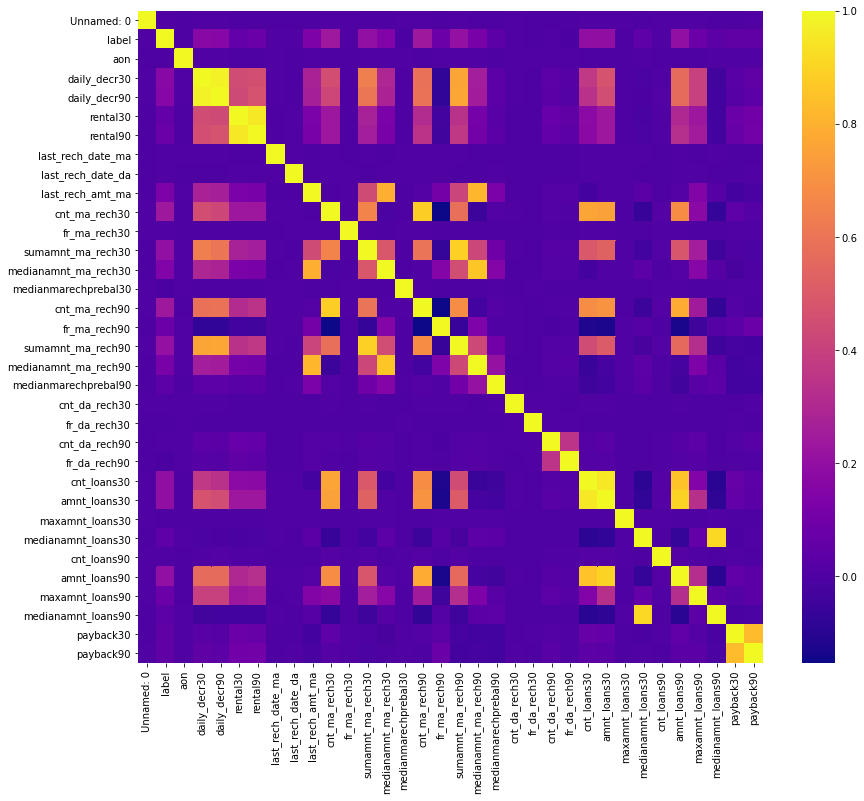

In [53]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),cmap='plasma')

##### Observations from the correlation map
1. Columns relating to recharge are highly correlated to each other ex:- daily_decr30, daily_decr90, rental30, rental90, sumamnt_ma_rech90, sumamnt_ma_rech30

In [54]:
#### Analysing through grouping
labelgroup=df.groupby(df['label']).mean()
labelgroup

Unnamed: 0          aon  daily_decr30  daily_decr90     rental30  \
label                                                                        
0      104732.412316  8870.998799   1272.376756   1278.817736  2029.914812   
1      104806.211873  8004.139590   5967.455497   6767.646423  2787.095360   

          rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
label                                                                        
0      2329.486376        3223.694134        3470.381002       1237.045830   
1      3647.985363        3831.746662        3746.692974       2182.462408   

       cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
label                                                                         
0           1.303417   3548.410637        2258.849629           1036.967185   
1           4.359530   3764.303486        8481.191767           1923.474317   

       medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
label                                                                         
0               4542.476553       1.812744      4.903601        3210.102783   
1               3753.437868       6.957630      8.118012       13706.395778   

       medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
label                                                              
0               1198.435135             53.604368     220.177745   
1               1959.607547             97.505394     268.625497   

       fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
label                                                                         
0       3753.278511       0.038338      0.059361     1.431313      8.873634   
1       3748.954741       0.041945      0.043766     2.948340     19.246834   

       maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
label                                                                   
0           271.873754            0.028285    15.703549      9.642382   
1           275.055959            0.057700    18.922749     25.642590   

       maxamnt_loans90  medianamnt_loans90  payback30  payback90  
label                                                             
0             6.234386            0.027081   2.270777   2.979047  
1             6.769990            0.048787   3.559715   4.512952

##### Observations 
1. The Average main account balance over the past 90 days is 2329 for the group who have not repaid loan and 3831 for the group who have repaid loan properly. 
2. Similarly almost all the values of the group who have repaid loan and higher than those who have not repaid loan.

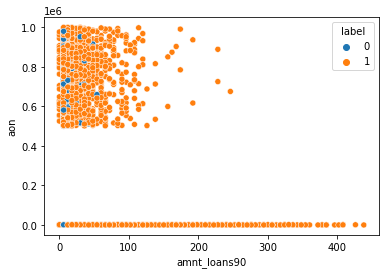

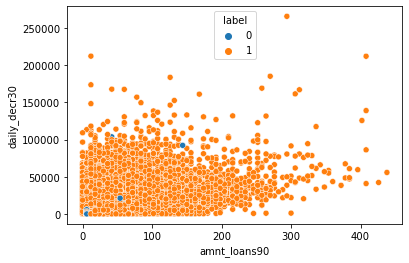

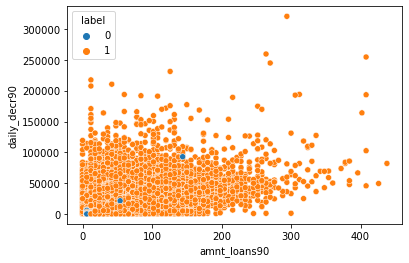

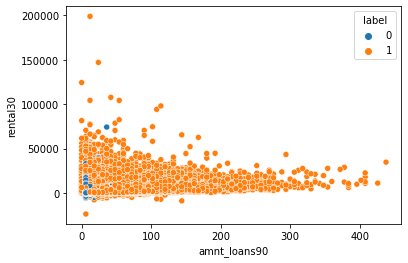

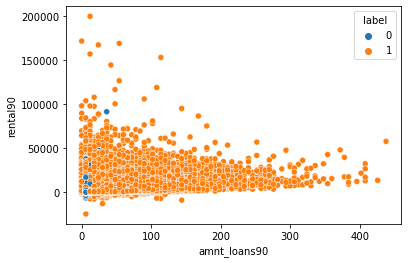

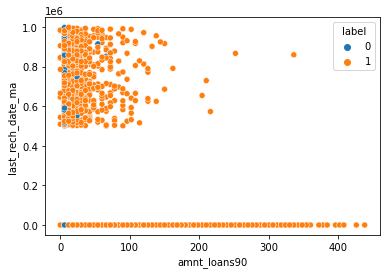

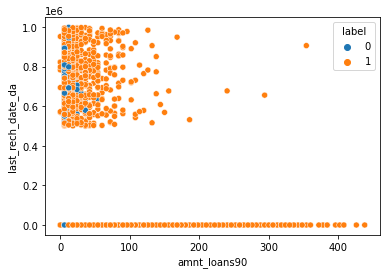

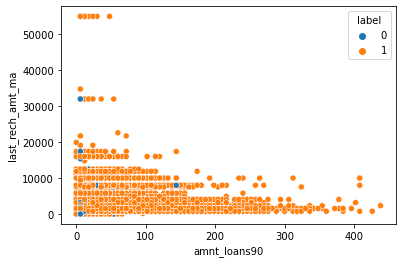

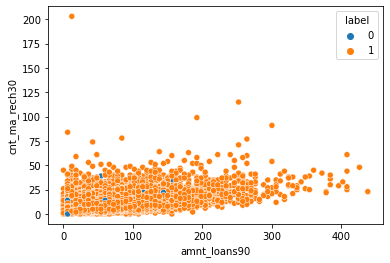

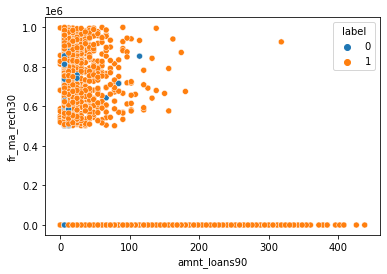

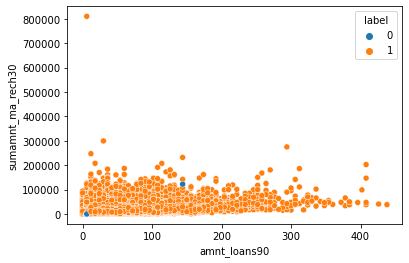

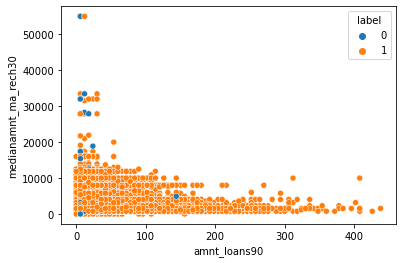

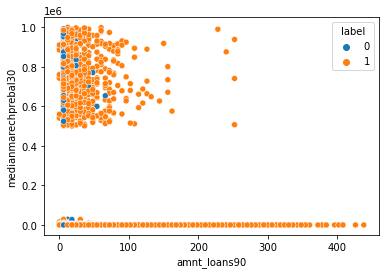

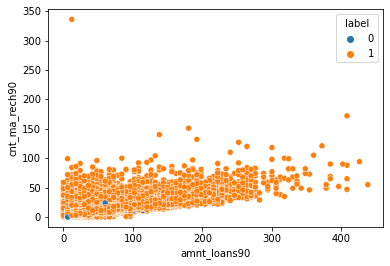

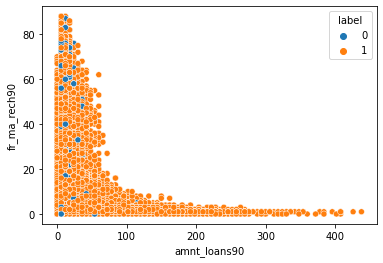

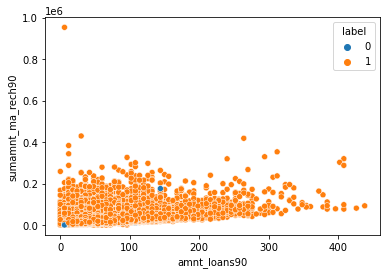

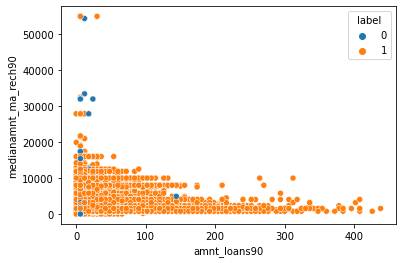

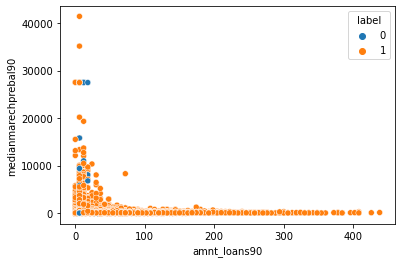

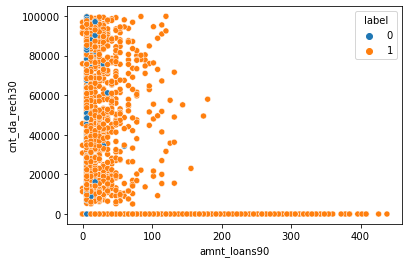

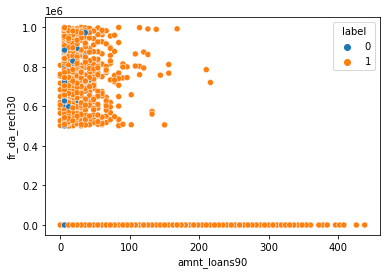

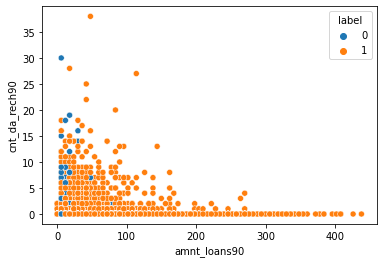

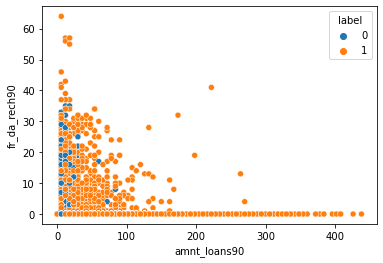

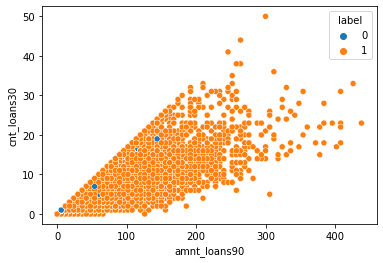

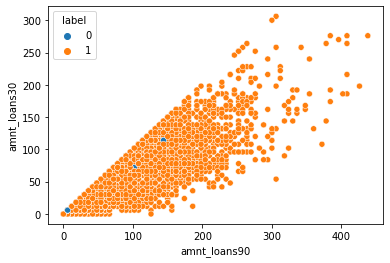

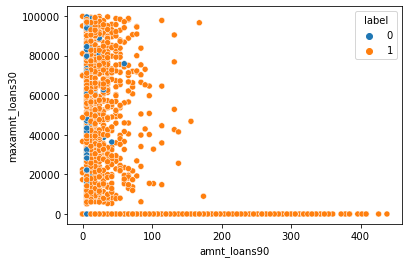

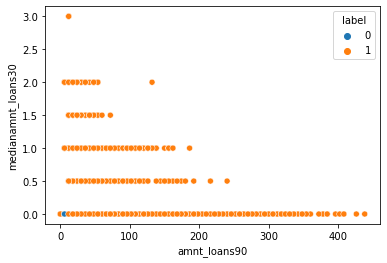

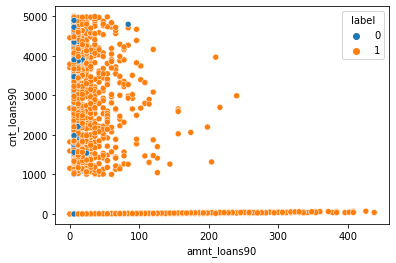

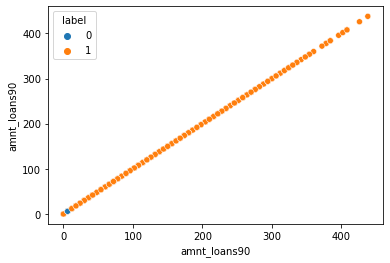

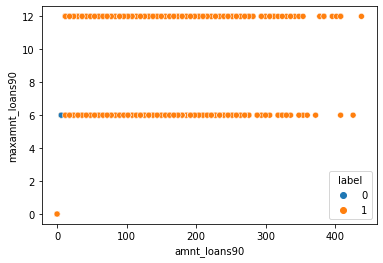

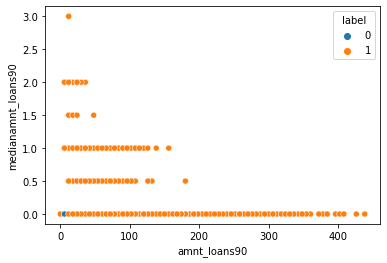

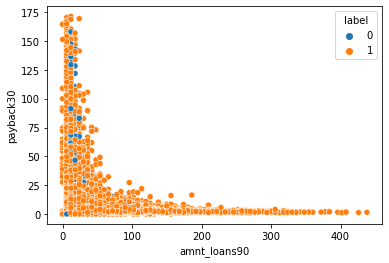

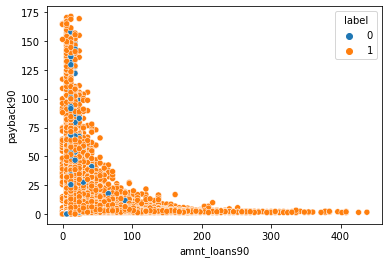

In [55]:
# amnt_loans90 - Total amount of loans taken by user in last 90 days
for i in ['aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']:
    sns.scatterplot(df['amnt_loans90'],df[i],hue=df['label'])
    plt.show()

<AxesSubplot:>

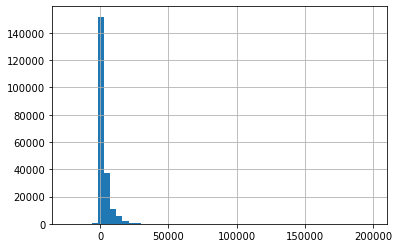

In [56]:
# rental30 - Average main account balance over last 30 days
# we can see that the data is centered around 0-5000
df['rental30'].hist(bins=50)

In [57]:
# Analysing by grouping the rental30 into different balances using the actual balance

In [60]:
df2=df
df2.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [64]:
df2['rental30']

0          220.13
1         3691.26
2          900.13
3          159.42
4         1098.90
           ...   
209588    1089.19
209589    1728.36
209590    5861.83
209591     411.83
209592     483.92
Name: rental30, Length: 209593, dtype: float64

In [66]:
df2.loc[df2['rental30']<=0,'balance_group']='no balance'
df2.loc[(df2['rental30']>0) & (df2['rental30']<=19766),'balance_group']='low balance'
df2.loc[(df2['rental30']>19766) & (df2['rental30']<=118572),'balance_group']='average balance'
df2.loc[(df2['rental30']>118572),'balance_group']='high balance'

In [67]:
df2.groupby('balance_group').mean()

Unnamed: 0     label          aon  daily_decr30  \
balance_group                                                         
average balance  104304.014206  0.905632  7252.493265  18008.935635   
high balance     159296.666667  1.000000   973.000000  16857.972444   
low balance      104764.105547  0.887237  8109.477932   5552.947555   
no balance       105342.981507  0.692891  8284.642223    964.547182   

                 daily_decr90       rental30       rental90  \
balance_group                                                 
average balance  21285.355468   26997.796621   34624.810472   
high balance     17066.626667  156775.723333  179968.743333   
low balance       6270.037103    2638.817720    3409.689873   
no balance        1045.625392    -181.051946    -122.535654   

                 last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
balance_group                                                             
average balance        3617.617606        3833.532002       3398.781329   
high balance              4.333333           0.333333       5775.333333   
low balance            3793.243527        3730.890989       2031.483292   
no balance             3226.292093        3419.537191       2350.113082   

                 cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
balance_group                                                     
average balance       5.986301   2637.606335       16774.912735   
high balance          3.666667      5.333333       15023.666667   
low balance           4.140260   3765.534971        7762.440118   
no balance            1.287934   3487.236391        5494.062983   

                 medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
balance_group                                                                
average balance           2985.765855           2276.163200      11.643836   
high balance              3693.000000            174.950000       4.000000   
low balance               1803.161628           3845.174481       6.570462   
no balance                1779.462635           4187.679411       1.761861   

                 fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
balance_group                                                            
average balance      6.307965       31377.281076           2970.797818   
high balance         5.000000       18357.000000           4026.333333   
low balance          7.933167       12546.149693           1830.783263   
no balance           4.739200        7349.988404           2197.110391   

                 medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
balance_group                                                        
average balance            187.226748     243.650611   3080.400049   
high balance               152.950000       0.333333      0.000000   
low balance                 90.713282     259.196047   3772.259895   
no balance                  97.127231     315.302856   3514.831816   

                 cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
balance_group                                                             
average balance       0.154236      0.152207     3.560629     27.242009   
high balance          0.333333      0.000000     1.666667     12.000000   
low balance           0.042171      0.046414     2.835952     18.430130   
no balance            0.014628      0.019479     1.505230      9.520236   

                 maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
balance_group                                                       
average balance       390.910501            0.047184    17.507427   
high balance            6.000000            0.000000     1.666667   
low balance           272.553190            0.052545    18.604996   
no balance            288.380648            0.076929    17.437201   

                 amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
balance_group                                                                 

##### Observations
A. With respect to last 90 days average,
1. The average payout time of customers with no balance is around 1.02 days.
2. The average payout time of customers with low balance is around 4.52 days.
3. The average payout time of customers with average balance is around 6.33 days.
4. The average payout time of customers with high balance is around 7.08 days.
5. The average no. of days as customers in the mobile company, the group with no balance and low balance are highest, followed by average balance. Where as high balance group have least no. of days in the company as customers.

A. The customers with low and no balance are most loyal to the company and their payout time is the lowest amongst all. That is they repay the loan at the earliest. Whereas the customers with high balance have highest payout time and less no. of days as customers.

AxesSubplot(0.125,0.125;0.775x0.755)


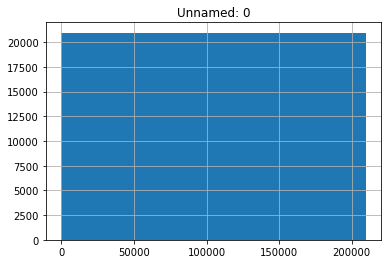

AxesSubplot(0.125,0.125;0.775x0.755)


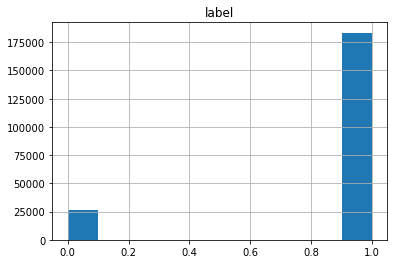

AxesSubplot(0.125,0.125;0.775x0.755)


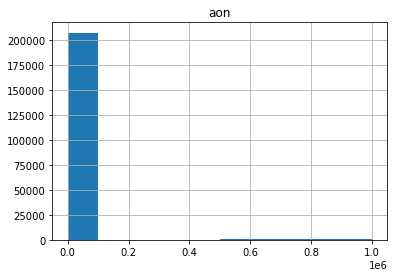

AxesSubplot(0.125,0.125;0.775x0.755)


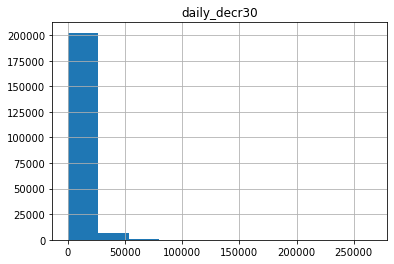

AxesSubplot(0.125,0.125;0.775x0.755)


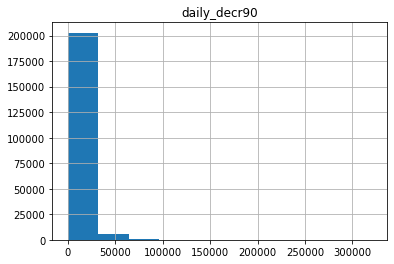

AxesSubplot(0.125,0.125;0.775x0.755)


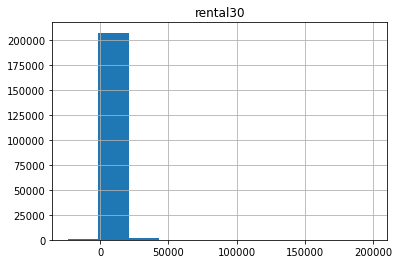

AxesSubplot(0.125,0.125;0.775x0.755)


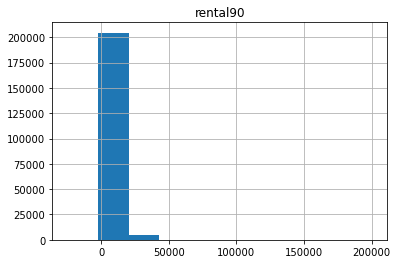

AxesSubplot(0.125,0.125;0.775x0.755)


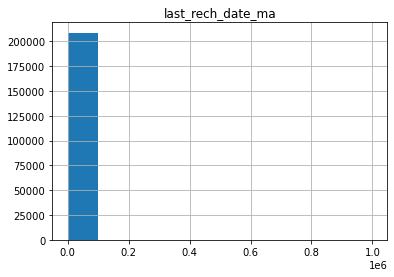

AxesSubplot(0.125,0.125;0.775x0.755)


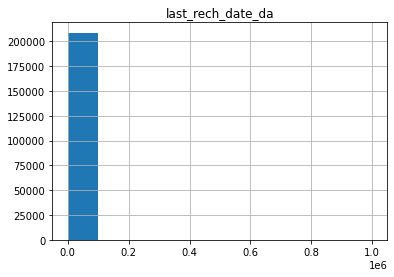

AxesSubplot(0.125,0.125;0.775x0.755)


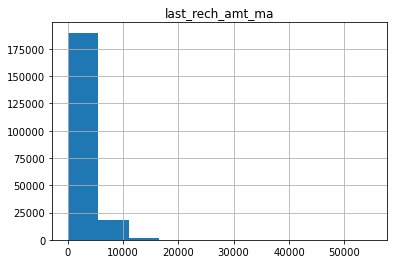

AxesSubplot(0.125,0.125;0.775x0.755)


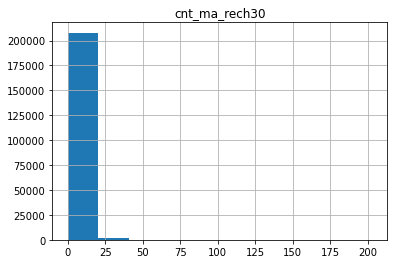

AxesSubplot(0.125,0.125;0.775x0.755)


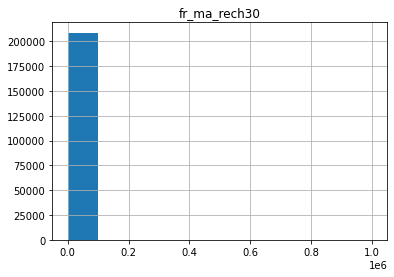

AxesSubplot(0.125,0.125;0.775x0.755)


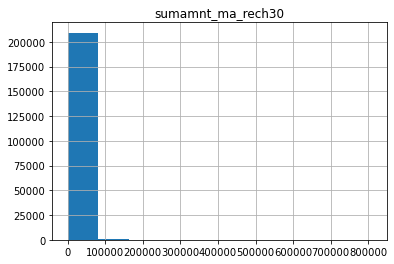

AxesSubplot(0.125,0.125;0.775x0.755)


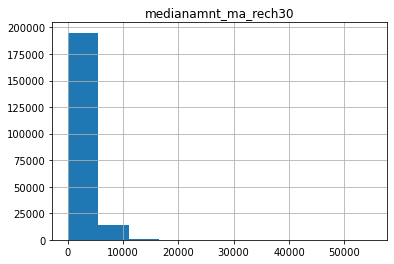

AxesSubplot(0.125,0.125;0.775x0.755)


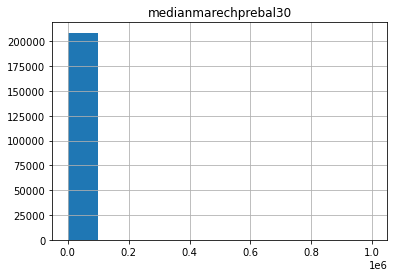

AxesSubplot(0.125,0.125;0.775x0.755)


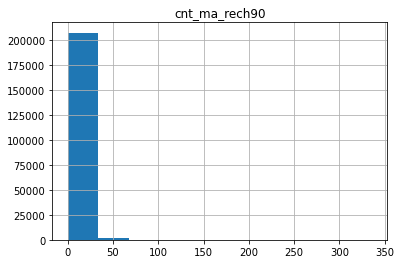

AxesSubplot(0.125,0.125;0.775x0.755)


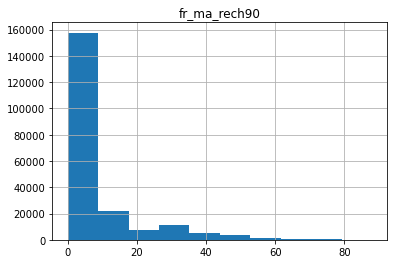

AxesSubplot(0.125,0.125;0.775x0.755)


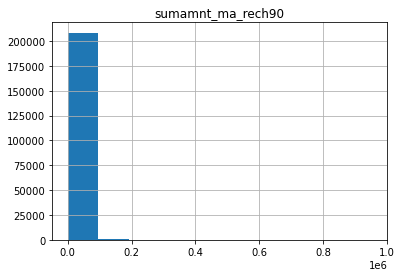

AxesSubplot(0.125,0.125;0.775x0.755)


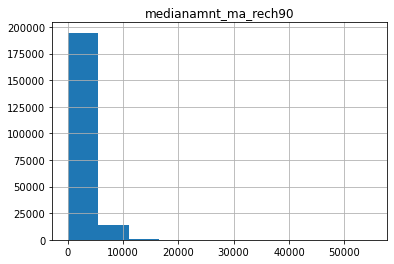

AxesSubplot(0.125,0.125;0.775x0.755)


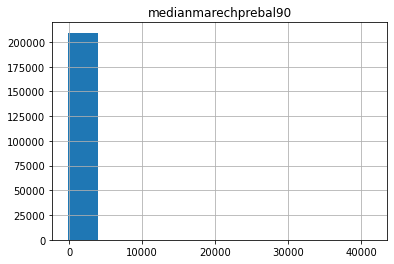

AxesSubplot(0.125,0.125;0.775x0.755)


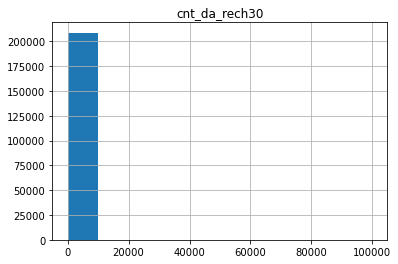

AxesSubplot(0.125,0.125;0.775x0.755)


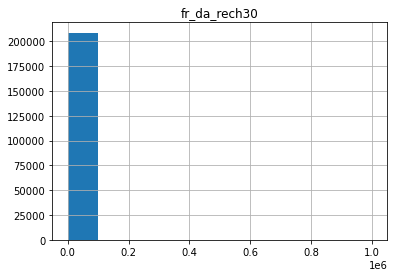

AxesSubplot(0.125,0.125;0.775x0.755)


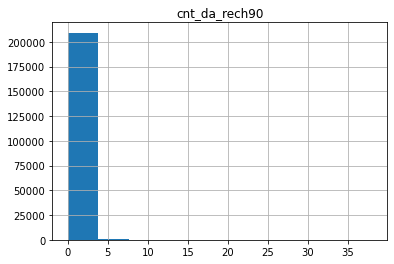

AxesSubplot(0.125,0.125;0.775x0.755)


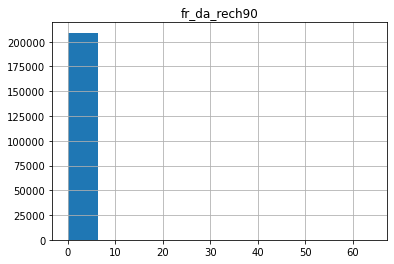

AxesSubplot(0.125,0.125;0.775x0.755)


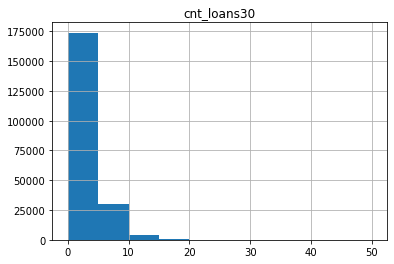

AxesSubplot(0.125,0.125;0.775x0.755)


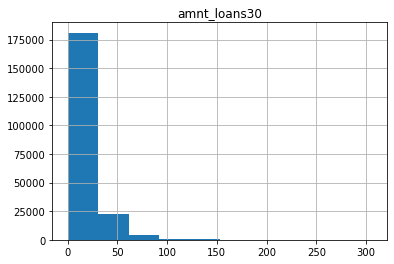

AxesSubplot(0.125,0.125;0.775x0.755)


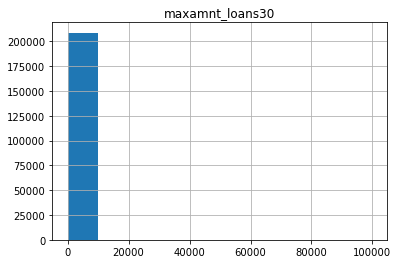

AxesSubplot(0.125,0.125;0.775x0.755)


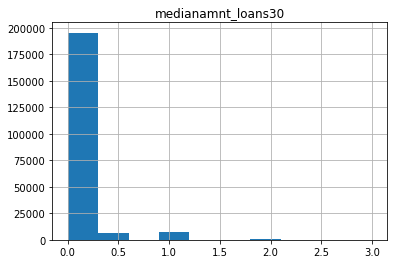

AxesSubplot(0.125,0.125;0.775x0.755)


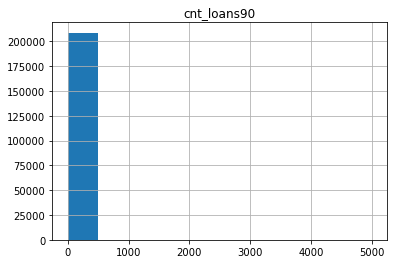

AxesSubplot(0.125,0.125;0.775x0.755)


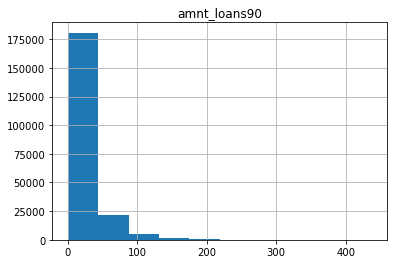

AxesSubplot(0.125,0.125;0.775x0.755)


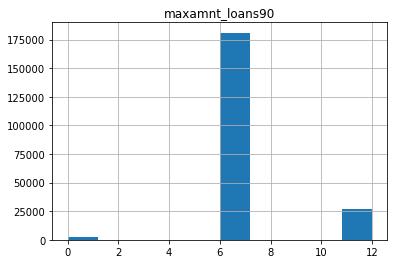

AxesSubplot(0.125,0.125;0.775x0.755)


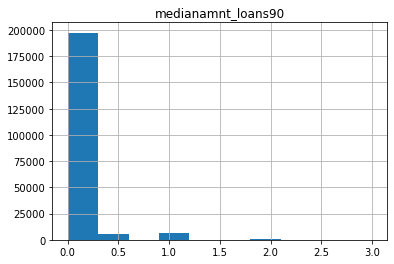

AxesSubplot(0.125,0.125;0.775x0.755)


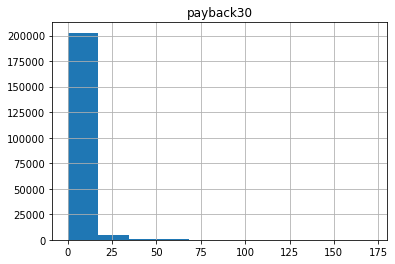

AxesSubplot(0.125,0.125;0.775x0.755)


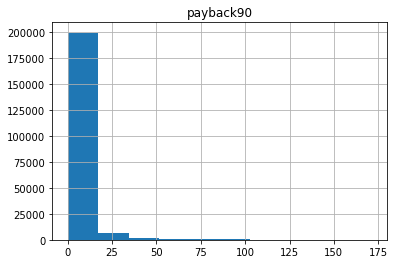

AxesSubplot(0.125,0.125;0.775x0.755)


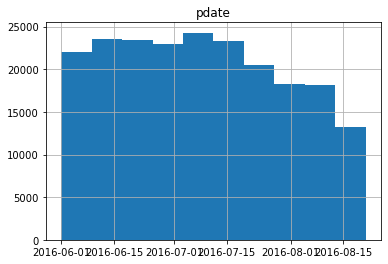

In [69]:
for i in df.columns:
    if df[i].dtype!='O':
        print(df[i].hist())
        plt.title(i)
        plt.show()

In [70]:
dfnew=df.drop(['pdate','msisdn','pcircle','balance_group'],axis=1)

In [71]:
dfnew

Unnamed: 0  label     aon  daily_decr30  daily_decr90  rental30  \
0                1      0   272.0   3055.050000   3065.150000    220.13   
1                2      1   712.0  12122.000000  12124.750000   3691.26   
2                3      1   535.0   1398.000000   1398.000000    900.13   
3                4      1   241.0     21.228000     21.228000    159.42   
4                5      1   947.0    150.619333    150.619333   1098.90   
...            ...    ...     ...           ...           ...       ...   
209588      209589      1   404.0    151.872333    151.872333   1089.19   
209589      209590      1  1075.0     36.936000     36.936000   1728.36   
209590      209591      1  1013.0  11843.111667  11904.350000   5861.83   
209591      209592      1  1732.0  12488.228333  12574.370000    411.83   
209592      209593      1  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0         260.13                2.0                0.0              1539   
1        3691.26               20.0                0.0              5787   
2         900.13                3.0                0.0              1539   
3         159.42               41.0                0.0               947   
4        1098.90                4.0                0.0              2309   
...          ...                ...                ...               ...   
209588   1089.19                1.0                0.0              4048   
209589   1728.36                4.0                0.0               773   
209590   8893.20                3.0                0.0              1539   
209591    984.58                2.0               38.0               773   
209592    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   2          21.0             3078.0                1539.0   
1                   1           0.0             5787.0                5787.0   
2                   1           0.0             1539.0                1539.0   
3                   0           0.0                0.0                   0.0   
4                   7           2.0            20029.0                2309.0   
...               ...           ...                ...                   ...   
209588              3           2.0            10404.0                3178.0   
209589              4           1.0             3092.0                 773.0   
209590              5           8.0             9334.0                1539.0   
209591              5           4.0            12154.0                 773.0   
209592              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0

### Removing Outlier 

In [72]:
from scipy.stats import zscore 
z=zscore(dfnew)
dfnew1=dfnew[(z<3).all(axis=1)]
dfnew1

Unnamed: 0  label     aon  daily_decr30  daily_decr90  rental30  \
0                1      0   272.0   3055.050000   3065.150000    220.13   
1                2      1   712.0  12122.000000  12124.750000   3691.26   
2                3      1   535.0   1398.000000   1398.000000    900.13   
3                4      1   241.0     21.228000     21.228000    159.42   
4                5      1   947.0    150.619333    150.619333   1098.90   
...            ...    ...     ...           ...           ...       ...   
209588      209589      1   404.0    151.872333    151.872333   1089.19   
209589      209590      1  1075.0     36.936000     36.936000   1728.36   
209590      209591      1  1013.0  11843.111667  11904.350000   5861.83   
209591      209592      1  1732.0  12488.228333  12574.370000    411.83   
209592      209593      1  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0         260.13                2.0                0.0              1539   
1        3691.26               20.0                0.0              5787   
2         900.13                3.0                0.0              1539   
3         159.42               41.0                0.0               947   
4        1098.90                4.0                0.0              2309   
...          ...                ...                ...               ...   
209588   1089.19                1.0                0.0              4048   
209589   1728.36                4.0                0.0               773   
209590   8893.20                3.0                0.0              1539   
209591    984.58                2.0               38.0               773   
209592    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   2          21.0             3078.0                1539.0   
1                   1           0.0             5787.0                5787.0   
2                   1           0.0             1539.0                1539.0   
3                   0           0.0                0.0                   0.0   
4                   7           2.0            20029.0                2309.0   
...               ...           ...                ...                   ...   
209588              3           2.0            10404.0                3178.0   
209589              4           1.0             3092.0                 773.0   
209590              5           8.0             9334.0                1539.0   
209591              5           4.0            12154.0                 773.0   
209592              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0

In [73]:
dfnew1.head()

Unnamed: 0  label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0           1      0  272.0   3055.050000   3065.150000    220.13    260.13   
1           2      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2           3      1  535.0   1398.000000   1398.000000    900.13    900.13   
3           4      1  241.0     21.228000     21.228000    159.42    159.42   
4           5      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [74]:
df3=dfnew1
df3.loc[df3['rental30']<=0,'balance_group']='no balance'
df3.loc[(df3['rental30']>0) & (df3['rental30']<=19766),'balance_group']='low balance'
df3.loc[(df3['rental30']>19766) & (df3['rental30']<=118572),'balance_group']='average balance'
df3.loc[(df3['rental30']>118572),'balance_group']='high balance'
df3.groupby('balance_group').mean()

Unnamed: 0     label         aon  daily_decr30  \
balance_group                                                      
low balance    104783.621560  0.877177  646.986834   4004.675208   
no balance     105296.588059  0.653962  630.269151    816.720447   

               daily_decr90     rental30     rental90  last_rech_date_ma  \
balance_group                                                              
low balance     4423.996299  2144.298753  2700.376340           5.855019   
no balance       880.798478  -139.800775   -95.386847           8.403398   

               last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
balance_group                                                       
low balance             0.827651       1781.322187        3.60529   
no balance              0.432407       1716.504506        1.02469   

               fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
balance_group                                                          
low balance        4.100633        6166.826489           1594.415204   
no balance         1.518870        3231.433252           1261.545578   

               medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  \
balance_group                                                      
low balance               79.859368       5.538424      7.036104   
no balance                37.706178       1.435411      3.787927   

               sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
balance_group                                                                  
low balance          9616.845293           1619.993571             72.944365   
no balance           4495.933909           1604.701558             46.911054   

               cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  \
balance_group                                                             
low balance         4.148201           0.0       0.020208           0.0   
no balance          3.755073           0.0       0.009670           0.0   

               cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
balance_group                                                                   
low balance       2.569291     16.285433        10.001623            0.016096   
no balance        1.417386      8.945362        13.831556            0.009247   

               cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
balance_group                                                                   
low balance       3.317461     20.809031         6.545046            0.012519   
no balance        1.475873      9.296846         6.354863            0.009576   

               payback30  payback90  
balance_group                        
low balance     2.722975   3.337486  
no balance      0.753657   0.855679

In [75]:
# Removing outliers is removing the high balance and average balance customers. So lets us use the dataframe where outliers are maintained and check the model

In [76]:
dfnew1.drop('balance_group',axis=1,inplace=True)

### Feature Selection

In [77]:
#### Feature selection using PCA

from sklearn.decomposition import PCA

pca=PCA()
pca.fit(dfnew1)

PCA()

In [79]:
data_pca=pca.transform(dfnew1)

In [80]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.93982626, 0.98422864, 0.99288658, 0.9964283 , 0.99806723,
       0.99938642, 0.99957312, 0.99973556, 0.99982659, 0.99990754,
       0.99996999, 0.99998044, 0.99998995, 0.99999844, 0.99999985,
       0.99999992, 0.99999995, 0.99999997, 0.99999998, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [81]:
dfnew1.shape

(163017, 34)

In [83]:
cov_matrix = np.cov(dfnew1.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 3.66528361e+09 -1.81362075e+01  2.46004782e+04 ... -7.03984497e+00
  -1.48482650e+02 -1.48627941e+01]
 [-1.81362075e+01  1.18528481e-01  1.46198823e+01 ...  7.73686933e-04
   2.02590371e-01  2.35096664e-01]
 [ 2.46004782e+04  1.46198823e+01  2.46679840e+05 ... -1.75641672e-01
   4.58443406e+01  1.01898265e+02]
 ...
 [-7.03984497e+00  7.73686933e-04 -1.75641672e-01 ...  6.01155116e-03
   2.87488098e-03  5.20152504e-03]
 [-1.48482650e+02  2.02590371e-01  4.58443406e+01 ...  2.87488098e-03
   1.77770382e+01  1.64872491e+01]
 [-1.48627941e+01  2.35096664e-01  1.01898265e+02 ...  5.20152504e-03
   1.64872491e+01  2.44073762e+01]]


In [84]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [85]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [86]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 93.98262625  98.4228643   99.28865799  99.64282996  99.80672271
  99.93864201  99.95731179  99.97355566  99.9826592   99.9907544
  99.99699888  99.99804436  99.99899465  99.99984357  99.99998548
  99.99999192  99.99999482  99.99999662  99.99999777  99.99999862
  99.99999916  99.99999961  99.9999998   99.99999991  99.99999998
  99.99999999 100.         100.         100.         100.
 100.         100.         100.         100.        ]


In [88]:
pca = PCA(n_components=13)
pca.fit(dfnew)
data_pca = pd.DataFrame(pca.transform(dfnew))
data_pca.shape

(209593, 13)

### Spliting Model

In [89]:
# selecting the pca data for input X
X1=data_pca
y1=dfnew['label']

### Model Selection

In [90]:
# Splitting the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 13)
(62878, 13)
(146715,)
(62878,)


#### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [104]:
print('Training score =', model1.score(X_train, y_train))
print('Test score =', model1.score(X_test, y_test))

Training score = 0.855727089936271
Test score = 0.8569770030853399


### Metrics : confusion_matrix ,classification_report,Accuracy

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
ypred = model1.predict(X_test)

def metrics_report(y_test,ypred):
    print("Accuracy score is : ",accuracy_score(y_test,ypred))
    print("_"*60)
    print("Confustion Matrix :",confusion_matrix(y_test,ypred))
    print("_"*60)
    print("Classification report :",classification_report(y_test,ypred))

In [120]:
metrics_report(y_test,ypred)

Accuracy score is :  0.8569770030853399
____________________________________________________________
Confustion Matrix : [[  163  7622]
 [ 1371 53722]]
____________________________________________________________
Classification report :               precision    recall  f1-score   support

           0       0.11      0.02      0.03      7785
           1       0.88      0.98      0.92     55093

    accuracy                           0.86     62878
   macro avg       0.49      0.50      0.48     62878
weighted avg       0.78      0.86      0.81     62878



ROC AUC = 0.6375261444124825


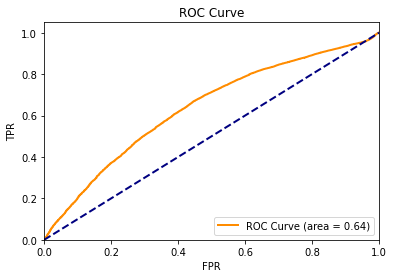

In [121]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Checking the other Model Performance 

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [123]:
##KNN
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
GS=RandomizedSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_weighted')

In [124]:
# Getting best parameters of KNN
GS.best_params_

{'weights': 'uniform', 'n_neighbors': 10}

In [125]:
#DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)

In [ ]:
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_train,y_train)

In [ ]:
# Getting best parameters of decision tree
GS.best_params_

In [ ]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=11,weights='distance')
DT=DecisionTreeClassifier(criterion='gini',max_depth=40,min_samples_leaf=19,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=7,random_state=0)
Bag=BaggingClassifier(n_estimators=3,random_state=0)
AB=AdaBoostClassifier(n_estimators=16,random_state=0)
#ABL=AdaBoostClassifier(base_estimator=LR,n_estimators=50,random_state=0)
GB=GradientBoostingClassifier(n_estimators=17)
#svm=SVC(C=10,gamma=0.001,kernel='rbf')
#stacked = StackingClassifier(classifiers=[Bag,RF,AB], meta_classifier=KNN)

In [ ]:
# RandomForest
from sklearn.model_selection import KFold, cross_val_score
RF_var=[]
for val in np.arange(1,50):
    RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(RF, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    RF_var.append(np.var(cv_results,ddof=1))

In [126]:
x_axis=np.arange(1,50)
plt.plot(x_axis,RF_var)

NameError: name 'RF_var' is not defined

In [ ]:
# To get n-estimators
np.argmin(RF_var)

In [ ]:
Bag_var=[]
for val in np.arange(1,20):
    Bag=BaggingClassifier(n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(Bag, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    Bag_var.append(np.var(cv_results,ddof=1))
    #print(val,np.var(cv_results,ddof=1))

In [ ]:
x_axis=np.arange(1,20)
plt.plot(x_axis,Bag_var)

In [ ]:
np.argmin(Bag_var)

In [ ]:
# AdaBoost Classifier
Ada_bias=[]
for val in np.arange(1,20):
    Ada=AdaBoostClassifier(n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(Ada, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    Ada_bias.append(1-np.mean(cv_results))
    #print(val,1-np.mean(cv_results))

In [ ]:
x_axis=np.arange(1,20)
plt.plot(x_axis,Ada_bias)

In [ ]:
np.argmin(Ada_bias)

In [ ]:
#Gradient Boost Clsssifier
GB_bias=[]
for val in np.arange(1,20):
    gb=GradientBoostingClassifier(n_estimators=val)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(gb, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    GB_bias.append(1-np.mean(cv_results))
    #print(val,1-np.mean(cv_results))

In [ ]:
x_axis=np.arange(1,20)
plt.plot(x_axis,GB_bias)

In [ ]:
np.argmin(GB_bias)

In [ ]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('BaggingClassifier',Bag))
models.append(('AdaBoost',AB))
models.append(('GBoost',GB))
#models.append(('Stacked',stacked))

In [ ]:
#evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure(figsize=(10,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=45)
plt.show()

In [ ]:
# Finalising the RandomForest which is giving better results
RF.fit(X_train,y_train)
predictions = RF.predict(X_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(cm)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

In [ ]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# saving the model
import joblib
joblib.dump(RF,'RF_MicroCredit')